# NFL Over Under Machine Learning

## Pre Processing

In [1]:
# import dependencies
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import os

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
# create engine
engine = create_engine("sqlite:///nfl_ml_dataset.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()

In [ ]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [ ]:
# view keys
Base.classes.keys()

In [ ]:
session = Session(engine)

In [ ]:
dat = session.query

In [ ]:
df = pd.DataFrame(dat, columns=[])

In [ ]:
from sqlalchemy.sql import text
sql = '''
    SELECT * FROM table;
'''
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(sql))         
df = pd.DataFrame(query.fetchall())

In [ ]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("nfl_ml_dataset.sqlite")
df = pd.read_sql_query("SELECT * from nfl_ml_dataset", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

In [2]:
# import data
data = Path('nfl_ml_dataset(1).csv')
df = pd.read_csv(data)
df.head()

,index,schedule_date,schedule_season,schedule_week,team_home,team_home_full,team_away_full,score_home,score_away,score_total,...,dvoa_special_cumulative,dvoa_special_difference,dvoa_home_offense_matchup,dvoa_away_offense_matchup,composite_pace_average,composite_pace_difference,dvoa_offdefdiff_cumulative,dvoa_offdefdiff_difference,offense_matchup_cumulative,offense_matchup_difference
0,1,9/5/1993,1993,1,BUF,BUF1993,NE1993,38,14,52,...,-5.6,6.4,9.6,-17.7,26.2650,3.600,-4.6,7.8,-8.1,27.3
1,2,9/5/1993,1993,1,CHI,CHI1993,NYG1993,20,26,46,...,3.6,1.8,-15.2,6.5,30.6750,0.560,-7.0,27.6,-8.7,21.7
2,3,9/5/1993,1993,1,CLE,CLE1993,CIN1993,27,14,41,...,4.7,5.7,9.4,-16.3,29.9425,2.565,-26.2,1.0,-6.9,25.7
3,4,9/5/1993,1993,1,DET,DET1993,ATL1993,30,13,43,...,11.9,1.3,-4.3,-11.6,31.4300,1.560,-31.1,2.9,-15.9,7.3
4,5,9/5/1993,1993,1,GB,GB1993,LAR1993,36,6,42,...,-0.7,11.1,16.3,-6.5,29.4900,0.190,-0.1,17.1,9.8,22.8


In [4]:
# view columns, types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       7109 non-null   int64  
 1   schedule_date               7109 non-null   object 
 2   schedule_season             7109 non-null   int64  
 3   schedule_week               7109 non-null   int64  
 4   team_home                   7109 non-null   object 
 5   team_home_full              7109 non-null   object 
 6   team_away_full              7109 non-null   object 
 7   score_home                  7109 non-null   int64  
 8   score_away                  7109 non-null   int64  
 9   score_total                 7109 non-null   int64  
 10  over_under_line             7109 non-null   float64
 11  over_under_diff             7109 non-null   float64
 12  over_binary                 7109 non-null   int64  
 13  spread_favorite             7109 

<AxesSubplot:>

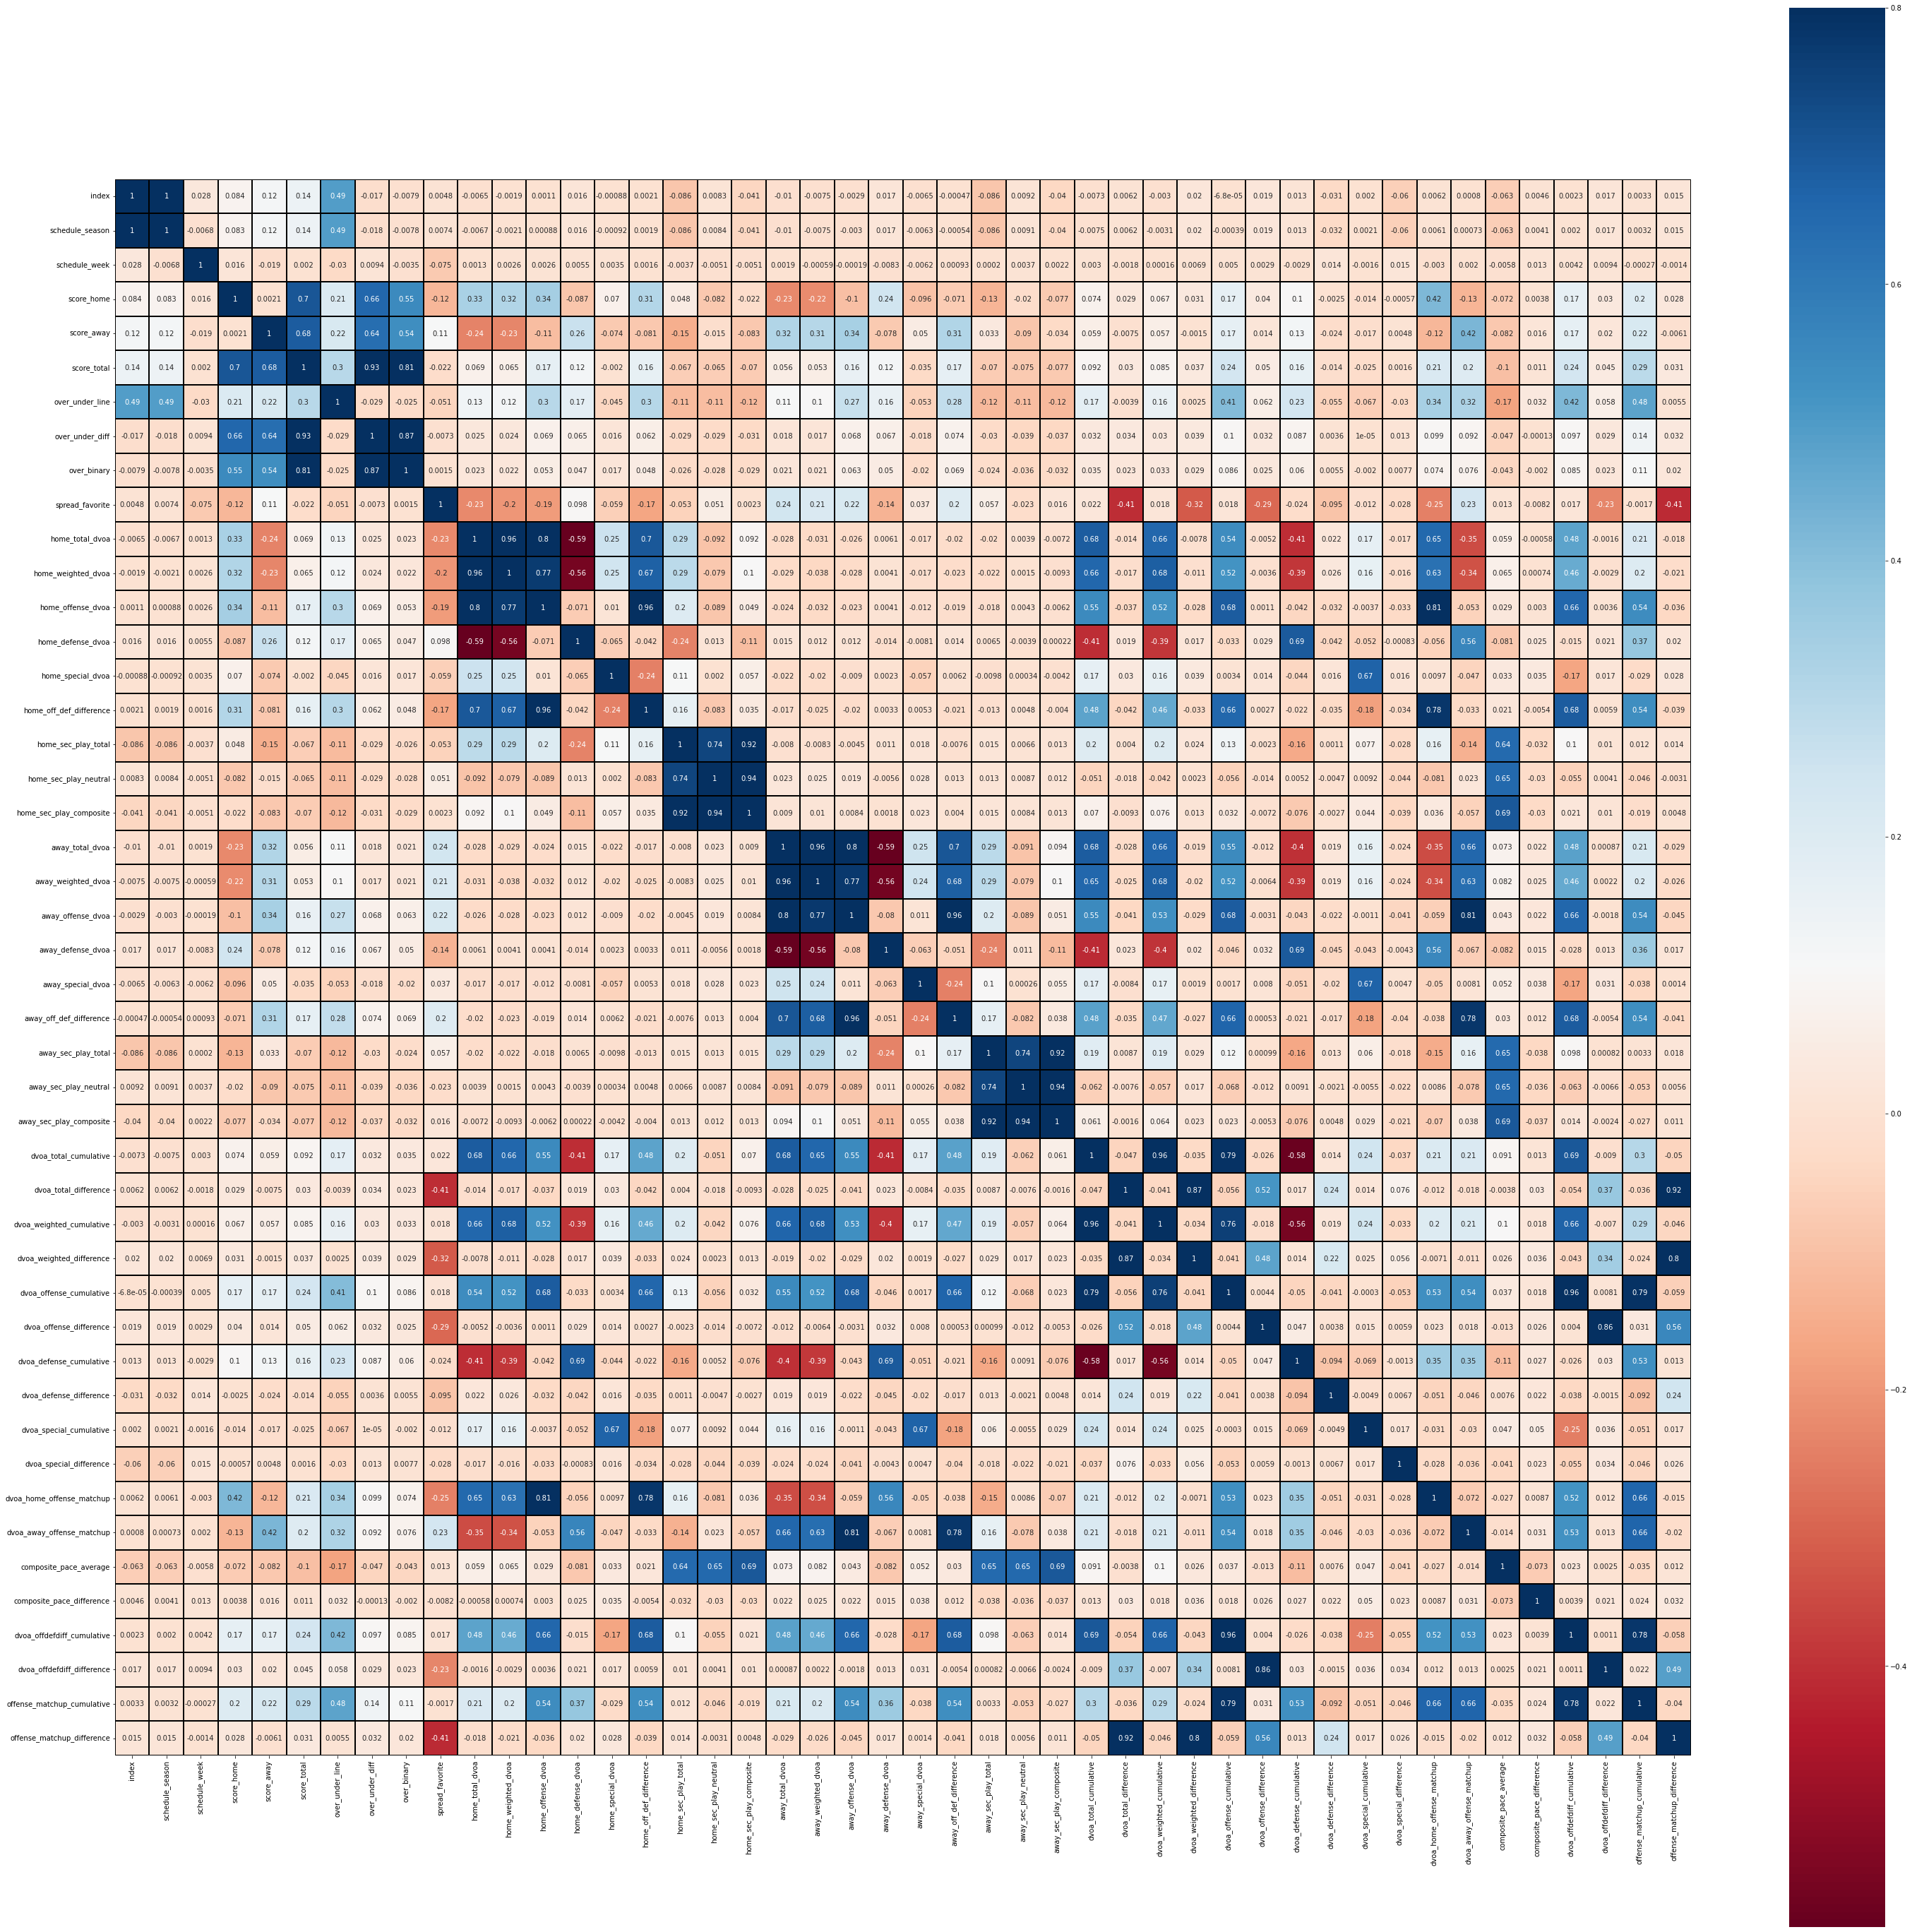

In [55]:
# bi variate heat map
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt

corr = df.corr(method='spearman')
plt.figure(figsize=(50,50))
sn.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True,
           cmap='RdBu', linecolor='black')

In [3]:
# describe numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,7109.0,3555.000000,2052.335864,1.0000,1778.000,3555.000,5332.0000,7109.000
schedule_season,7109.0,2007.230412,8.306053,1993.0000,2000.000,2007.000,2014.0000,2021.000
schedule_week,7109.0,9.170629,5.019293,1.0000,5.000,9.000,14.0000,18.000
score_home,7109.0,22.930511,10.305748,0.0000,16.000,23.000,30.0000,62.000
score_away,7109.0,20.541286,10.140121,0.0000,13.000,20.000,27.0000,59.000
score_total,7109.0,43.471796,14.332492,3.0000,33.000,43.000,52.0000,106.000
over_under_line,7109.0,42.734801,4.934734,28.0000,39.000,42.500,46.0000,63.500
over_under_diff,7109.0,0.736995,13.626319,-39.5000,-9.000,-0.500,9.5000,68.500
over_binary,7109.0,0.494725,0.500007,0.0000,0.000,0.000,1.0000,1.000
spread_favorite,7109.0,-5.446336,3.478727,-26.5000,-7.000,-4.500,-3.0000,0.000


In [5]:
# define target variable and drop irrelevant columns for ML
y = df['over_binary']

X = df.drop(columns=['index', 'schedule_date', 'team_home', 'team_home_full', 'team_away_full', 
                     'score_home', 'score_away', 'score_total', 'over_under_diff', 'over_binary'])
X.head()

,schedule_season,schedule_week,over_under_line,spread_favorite,home_total_dvoa,home_weighted_dvoa,home_offense_dvoa,home_defense_dvoa,home_special_dvoa,home_off_def_difference,...,dvoa_special_cumulative,dvoa_special_difference,dvoa_home_offense_matchup,dvoa_away_offense_matchup,composite_pace_average,composite_pace_difference,dvoa_offdefdiff_cumulative,dvoa_offdefdiff_difference,offense_matchup_cumulative,offense_matchup_difference
0,1993,1,38.5,-14.0,7.8,-2.0,2.0,-5.5,0.4,1.6,...,-5.6,6.4,9.6,-17.7,26.2650,3.600,-4.6,7.8,-8.1,27.3
1,1993,1,35.0,-1.0,-7.2,-12.6,-14.6,-4.7,2.7,-17.3,...,3.6,1.8,-15.2,6.5,30.6750,0.560,-7.0,27.6,-8.7,21.7
2,1993,1,35.5,-7.5,0.0,5.6,-7.4,-2.2,5.2,-12.6,...,4.7,5.7,9.4,-16.3,29.9425,2.565,-26.2,1.0,-6.9,25.7
3,1993,1,44.0,-5.0,-2.3,-0.4,-11.7,-4.1,5.3,-17.0,...,11.9,1.3,-4.3,-11.6,31.4300,1.560,-31.1,2.9,-15.9,7.3
4,1993,1,38.5,-6.5,10.8,9.7,-3.4,-9.1,5.2,-8.6,...,-0.7,11.1,16.3,-6.5,29.4900,0.190,-0.1,17.1,9.8,22.8


In [6]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
print(X_train.shape)
print(X_test.shape)

(5331, 40)
(1778, 40)


In [7]:
# creating and fitting a standard scaler with the training data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

# scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# optional pca for viz?
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
pca.fit(X_test_scaled)
print(pca.explained_variance_ratio_)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
df_pca = pd.DataFrame(X_train_pca)
df_pca

[0.19356437 0.12446681]


,0,1
0,-0.276927,2.897833
1,2.325886,-0.135053
2,-0.314408,-3.861135
3,5.594682,-1.504530
4,-1.565580,3.558029
...,...,...
5326,-3.610849,1.991120
5327,1.394479,-2.003589
5328,-3.674884,3.261628
5329,1.959721,-0.722324


## ML Algorithms

### Logisitic Regression

In [10]:
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=128,
                                random_state=0)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=128, random_state=0)

In [11]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
logreg_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {logreg_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,518,380
Actual Over,427,453


Accuracy Score : 0.546119235095613
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       898
           1       0.54      0.51      0.53       880

    accuracy                           0.55      1778
   macro avg       0.55      0.55      0.55      1778
weighted avg       0.55      0.55      0.55      1778



### Perceptron

In [12]:
classifier = Perceptron(random_state=0)
classifier.fit(X_train_scaled, y_train)

Perceptron()

In [13]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
percep_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {percep_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,472,426
Actual Over,428,452


Accuracy Score : 0.5196850393700787
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       898
           1       0.51      0.51      0.51       880

    accuracy                           0.52      1778
   macro avg       0.52      0.52      0.52      1778
weighted avg       0.52      0.52      0.52      1778



### Passive Aggressive Classifier

In [14]:
classifier = PassiveAggressiveClassifier(random_state=0)
classifier.fit(X_train_scaled, y_train)

PassiveAggressiveClassifier(random_state=0)

In [15]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
pasagres_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {pasagres_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,507,391
Actual Over,422,458


Accuracy Score : 0.5427446569178853
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       898
           1       0.54      0.52      0.53       880

    accuracy                           0.54      1778
   macro avg       0.54      0.54      0.54      1778
weighted avg       0.54      0.54      0.54      1778



### Ridge Classifier

In [16]:
classifier = RidgeClassifier(alpha=100, random_state=0)
classifier.fit(X_train_scaled, y_train)

RidgeClassifier(alpha=100, random_state=0)

In [17]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
ridge_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {ridge_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,522,376
Actual Over,424,456


Accuracy Score : 0.5500562429696289
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       898
           1       0.55      0.52      0.53       880

    accuracy                           0.55      1778
   macro avg       0.55      0.55      0.55      1778
weighted avg       0.55      0.55      0.55      1778



### Suppor Vector Models

#### Linear SVM

In [18]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [19]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
linsvm_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {linsvm_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,530,368
Actual Over,439,441


Accuracy Score : 0.546119235095613
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       898
           1       0.55      0.50      0.52       880

    accuracy                           0.55      1778
   macro avg       0.55      0.55      0.54      1778
weighted avg       0.55      0.55      0.55      1778



#### RBF SVM

In [20]:
classifier = SVC(gamma=1, C=1, random_state=0)
classifier.fit(X_train_scaled, y_train)

SVC(C=1, gamma=1, random_state=0)

In [21]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
rbfsvm_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {rbfsvm_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,880,18
Actual Over,871,9


Accuracy Score : 0.5
              precision    recall  f1-score   support

           0       0.50      0.98      0.66       898
           1       0.33      0.01      0.02       880

    accuracy                           0.50      1778
   macro avg       0.42      0.50      0.34      1778
weighted avg       0.42      0.50      0.35      1778



### Nu-Support Vector Classification

In [22]:
classifier = NuSVC(random_state=0, nu=0.01, kernel='rbf')
classifier.fit(X_train_scaled, y_train)

NuSVC(nu=0.01, random_state=0)

In [23]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
nusvc_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {nusvc_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,504,394
Actual Over,463,417


Accuracy Score : 0.5179977502812149
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       898
           1       0.51      0.47      0.49       880

    accuracy                           0.52      1778
   macro avg       0.52      0.52      0.52      1778
weighted avg       0.52      0.52      0.52      1778



### Decision Tree

In [24]:
classifier = tree.DecisionTreeClassifier(random_state=0)
classifier = classifier.fit(X_train_scaled, y_train)

In [25]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
decision_tree_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {decision_tree_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,459,439
Actual Over,433,447


Accuracy Score : 0.5095613048368954
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       898
           1       0.50      0.51      0.51       880

    accuracy                           0.51      1778
   macro avg       0.51      0.51      0.51      1778
weighted avg       0.51      0.51      0.51      1778



### Random Forest Classifier

In [26]:
rf_model = RandomForestClassifier(n_estimators=8, random_state=0)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [27]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
randforest_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {randforest_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,459,439
Actual Over,433,447


Accuracy Score : 0.5095613048368954
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       898
           1       0.50      0.51      0.51       880

    accuracy                           0.51      1778
   macro avg       0.51      0.51      0.51      1778
weighted avg       0.51      0.51      0.51      1778



In [28]:
# showing feature importances
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.0374832680229771, 'dvoa_away_offense_matchup'),
 (0.03232392057646713, 'dvoa_weighted_difference'),
 (0.0317876286916085, 'over_under_line'),
 (0.029021511139305872, 'dvoa_home_offense_matchup'),
 (0.02892466691957601, 'composite_pace_average'),
 (0.02881715321066642, 'away_off_def_difference'),
 (0.028794620601704294, 'dvoa_offdefdiff_difference'),
 (0.02762399494758404, 'home_defense_dvoa'),
 (0.027590807869048144, 'away_sec_play_composite'),
 (0.027421068989239815, 'composite_pace_difference'),
 (0.027206989182836393, 'offense_matchup_difference'),
 (0.027040973290381153, 'home_sec_play_composite'),
 (0.027030631893351413, 'offense_matchup_cumulative'),
 (0.026519202752332847, 'home_sec_play_total'),
 (0.026397467143478712, 'home_offense_dvoa'),
 (0.02634592960242405, 'dvoa_offense_difference'),
 (0.025810865357519617, 'dvoa_offdefdiff_cumulative'),
 (0.02567432377943391, 'dvoa_special_cumulative'),
 (0.02464033783459718, 'dvoa_defense_cumulative'),
 (0.02453367850835149, 'away_

### Gradient Boosting Classifier

In [29]:
classifier = GradientBoostingClassifier(n_estimators=55,
   learning_rate=0.1, max_features=2, max_depth=3, random_state=0)
classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_features=2, n_estimators=55, random_state=0)

In [30]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
gradboost_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {gradboost_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,538,360
Actual Over,473,407


Accuracy Score : 0.531496062992126
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       898
           1       0.53      0.46      0.49       880

    accuracy                           0.53      1778
   macro avg       0.53      0.53      0.53      1778
weighted avg       0.53      0.53      0.53      1778



### AdaBoost Classifier

In [31]:
classifier = AdaBoostClassifier(n_estimators = 185,
                                learning_rate = .01,
                                random_state = 0)
classifier.fit(X_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=185, random_state=0)

In [32]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
adaboost_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {adaboost_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,540,358
Actual Over,454,426


Accuracy Score : 0.5433070866141733
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       898
           1       0.54      0.48      0.51       880

    accuracy                           0.54      1778
   macro avg       0.54      0.54      0.54      1778
weighted avg       0.54      0.54      0.54      1778



### Bagging Classifier

In [33]:
classifier = BaggingClassifier(n_estimators = 1000,
                               max_samples = 100, 
                               random_state = 0)
classifier.fit(X_train_scaled, y_train)

BaggingClassifier(max_samples=100, n_estimators=1000, random_state=0)

In [34]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
bag_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {bag_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,521,377
Actual Over,465,415


Accuracy Score : 0.5264341957255343
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       898
           1       0.52      0.47      0.50       880

    accuracy                           0.53      1778
   macro avg       0.53      0.53      0.52      1778
weighted avg       0.53      0.53      0.53      1778



### Extra Trees Classifier

In [35]:
classifier = ExtraTreesClassifier(n_estimators=200,
                                 criterion='entropy',
                                 max_depth=4,
                                 random_state=0)
classifier.fit(X_train_scaled, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=4, n_estimators=200,
                     random_state=0)

In [36]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
extratrees_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {extratrees_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,606,292
Actual Over,534,346


Accuracy Score : 0.5354330708661418
              precision    recall  f1-score   support

           0       0.53      0.67      0.59       898
           1       0.54      0.39      0.46       880

    accuracy                           0.54      1778
   macro avg       0.54      0.53      0.53      1778
weighted avg       0.54      0.54      0.53      1778



### Histogram Gradient Boosting Classifier

In [37]:
classifier = HistGradientBoostingClassifier(loss='auto',
                                           learning_rate=0.01,
                                           max_iter=60,
                                           random_state=0)
classifier.fit(X_train_scaled, y_train)

HistGradientBoostingClassifier(learning_rate=0.01, max_iter=60, random_state=0)

In [38]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
histgrad_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {histgrad_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,556,342
Actual Over,467,413


Accuracy Score : 0.5449943757030371
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       898
           1       0.55      0.47      0.51       880

    accuracy                           0.54      1778
   macro avg       0.55      0.54      0.54      1778
weighted avg       0.55      0.54      0.54      1778



### Gaussian Naive Bayes Classifier

In [39]:
classifier = GaussianNB() # no random_state parameter
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [40]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
nbayes_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {nbayes_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,557,341
Actual Over,482,398


Accuracy Score : 0.5371203599550056
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       898
           1       0.54      0.45      0.49       880

    accuracy                           0.54      1778
   macro avg       0.54      0.54      0.53      1778
weighted avg       0.54      0.54      0.53      1778



### Linear Discriminant Analysis Classifier

In [41]:
classifier = LinearDiscriminantAnalysis(solver='svd') # no random_state parameter
classifier.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [42]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
lda_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {lda_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,515,383
Actual Over,417,463


Accuracy Score : 0.5500562429696289
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       898
           1       0.55      0.53      0.54       880

    accuracy                           0.55      1778
   macro avg       0.55      0.55      0.55      1778
weighted avg       0.55      0.55      0.55      1778



### Quadratic Discriminant Analysis Classifier

In [43]:
classifier = QuadraticDiscriminantAnalysis() # no random_state parameter
classifier.fit(X_train_scaled, y_train)

C:\Users\david\anaconda3\envs\mlenv\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [44]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
qda_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {qda_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,646,252
Actual Over,614,266


Accuracy Score : 0.5129358830146231
              precision    recall  f1-score   support

           0       0.51      0.72      0.60       898
           1       0.51      0.30      0.38       880

    accuracy                           0.51      1778
   macro avg       0.51      0.51      0.49      1778
weighted avg       0.51      0.51      0.49      1778



### Nearest Neighbor Classifier

In [45]:
classifier = KNeighborsClassifier(2) # no random_state parameter
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
nearneighboor_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {nearneighboor_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,703,195
Actual Over,661,219


Accuracy Score : 0.5185601799775028
              precision    recall  f1-score   support

           0       0.52      0.78      0.62       898
           1       0.53      0.25      0.34       880

    accuracy                           0.52      1778
   macro avg       0.52      0.52      0.48      1778
weighted avg       0.52      0.52      0.48      1778



### MLP Neural Net

In [47]:
classifier = MLPClassifier(alpha=1, max_iter=1000, random_state=0)
classifier.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [48]:
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Under", "Actual Over"], columns=["Predicted Under", "Predicted Over"])
mlp_acc_score = accuracy_score(y_test, predictions)

display(cm_df)
print(f"Accuracy Score : {mlp_acc_score}")
print(classification_report(y_test, predictions))

,Predicted Under,Predicted Over
Actual Under,526,372
Actual Over,457,423


Accuracy Score : 0.5337457817772778
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       898
           1       0.53      0.48      0.51       880

    accuracy                           0.53      1778
   macro avg       0.53      0.53      0.53      1778
weighted avg       0.53      0.53      0.53      1778



### Neural Network

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 4
nodes_hidden_layer2 = 2
nn = tf.keras.models.Sequential()
dense = tf.keras.layers.Dense(2, kernel_regularizer='l1_l2')


# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation='relu', input_dim=number_input_features))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation='relu'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
print(nn.summary())

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

os.makedirs("checkpoints_optimization_change_activ/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_change_activ/weights.{epoch:02d}hdf5"
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=80, callbacks=[cp_callback], verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 164       
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
167/167 [==============================] - 1s 1ms/step - loss: 0.7429 - accuracy: 0.5010
Epoch 2/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5179
Epoch 3/80
167/167 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5333
Epoch 4/80
167/16

167/167 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5935
Epoch 73/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.5928
Epoch 74/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5937
Epoch 75/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5950
Epoch 76/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5901
Epoch 77/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5916
Epoch 78/80
167/167 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5946
Epoch 79/80
167/167 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5943
Epoch 80/80
167/167 [==============================] - 1s 3ms/step - loss: 0.6697 - accuracy: 0.5903


In [50]:
model_loss, nn_acc_score = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {nn_acc_score}")

56/56 - 0s - loss: 0.6923 - accuracy: 0.5388 - 350ms/epoch - 6ms/step
Loss: 0.6922680139541626, Accuracy: 0.5388076305389404


## Models Summary

In [51]:
dat = [{'LogReg' : logreg_acc_score,
       'Perceptron' : percep_acc_score,
       'PassiveAgressive' : pasagres_acc_score,
       'Ridge' : ridge_acc_score,
       'Linear SVM' : linsvm_acc_score,
       'RBF SVM' : rbfsvm_acc_score,
       'NuSupport SVC' : nusvc_acc_score,
       'Decision Tree' : decision_tree_acc_score,
       'Random Forest' : randforest_acc_score,
       'Gradient Boosting' : gradboost_acc_score,
       'AdaBoost' : adaboost_acc_score,
       'Bagging' : bag_acc_score,
       'Extra Trees' : extratrees_acc_score,
       'Hist Gradient Boost' : histgrad_acc_score,
       'Naive Bayes' : nbayes_acc_score,
       'LDA' : lda_acc_score,
       'QDA' : qda_acc_score,
       'Nearest Neighbor' : nearneighboor_acc_score,
       'MLP Neural Net' : mlp_acc_score,
       'Deep Neural Net' : nn_acc_score}]
df1 = pd.DataFrame(dat)
df2 = df1.transpose()
df2

,0
LogReg,0.546119
Perceptron,0.519685
PassiveAgressive,0.542745
Ridge,0.550056
Linear SVM,0.546119
RBF SVM,0.500000
NuSupport SVC,0.517998
Decision Tree,0.509561
Random Forest,0.509561
Gradient Boosting,0.531496
